In [1]:
import json
import pathlib
import sys
from io import StringIO
from IPython.display import display, SVG

import svgwrite
import numpy as np
import pandas as pd

sys.path.append(str(pathlib.Path().resolve().parents[1]))
from src.util.db_utils import SynFermDatabaseConnection
from src.util.color_palette import BodeColorPalette

In [2]:
from lxml import etree
from lxml.builder import E

In [3]:
con = SynFermDatabaseConnection()

In [4]:
res = con.con.execute("SELECT initiator_long, monomer_long, terminator_long, binary_outcome FROM virtuallibrary v INNER JOIN virtuallibrary_predictions p on v.id = p.vl_id WHERE v.type = 'A';").fetchall()

columns = [
    "I_long", 
    "M_long", 
    "T_long", 
    "binary_A",
]
df = pd.DataFrame(res, columns=columns)

In [7]:
def get_class(series):
    most_frequent_value = series.value_counts().index[0]
    if most_frequent_value == 1:
        return "success"
    if most_frequent_value == 0:
        return "fail"

In [5]:
x_axis = "Monomer"
y_axis = "Initiator"

x_index = np.sort(df[f"{x_axis[0]}_long"].unique())
y_index = np.sort(df[f"{y_axis[0]}_long"].unique())

# some settings for the plot
rect_x = 20
rect_y = 20
text_len = 80

x_total = len(x_index) * rect_x + text_len
y_total = len(y_index) * rect_y + text_len

# set root
svg = E.svg(viewBox=f"0 0 {x_total} {y_total}")

# set internal CSS styles
style = E.style("""
.success {
fill: #5790fc;
stroke: #729ef5;
}
.fail {
  fill: #e42536;
  stroke: #de4e5b;
}
.axes {
  stroke: black;
}
.axes-labels {
  fill: black;
  font-family: Helvetica, sans-serif;
  font-size: 12px;
  font-weight: bold;
}
""")
svg.append(style)

# set axes
axes = E.g()
axes.set("class", "axes")
axes.append(E.line(x1=str(text_len), x2=str(x_total), y1=str(y_total - text_len), y2=str(y_total - text_len)))  # x-axis
axes.append(E.line(x1=str(text_len), x2=str(text_len), y1="0", y2=str(y_total - text_len)))  # y-axis
svg.append(axes)

# set axes labels
axes_labels = E.g()
axes_labels.set("class", "axes-labels")
x_labels = E.text(transform=f"translate({text_len} {2 * y_total}) rotate(-90)")
y_labels = E.text(x="0", y=str(rect_y))

# x-axis labels
for i_x, x_label in enumerate(x_index):
    tspan = E.tspan(x_label, y=str((i_x + 0.5) * rect_x), x=str(y_total))
    x_labels.append(tspan)

# y-axis labels
for i_y, y_label in enumerate(y_index):
    tspan = E.tspan(y_label, x="0", y=str((i_y + 0.5) * rect_y))
    y_labels.append(tspan)

# Append the tspan elements
axes_labels.append(x_labels)
axes_labels.append(y_labels)
svg.append(axes_labels)

# set heatmap squares
squares = E.g()

for i_x, x in enumerate(x_index):
    for i_y, y in enumerate(y_index):
        data = df.loc[(df[f"{x_axis[0]}_long"] == x) & (df[f"{y_axis[0]}_long"] == y)]
        if len(data) > 0:
            offset_x = rect_x * i_x + text_len
            offset_y = rect_y * i_y
            square = E.rect(x=str(offset_x), y=str(offset_y), width=str(rect_x), height=str(rect_y), id=f"{x}_{y}")
            square.set("class", get_class(data["binary_A"]))
            squares.append(square)
svg.append(squares)

# render to string
s = etree.tostring(svg, pretty_print=True)

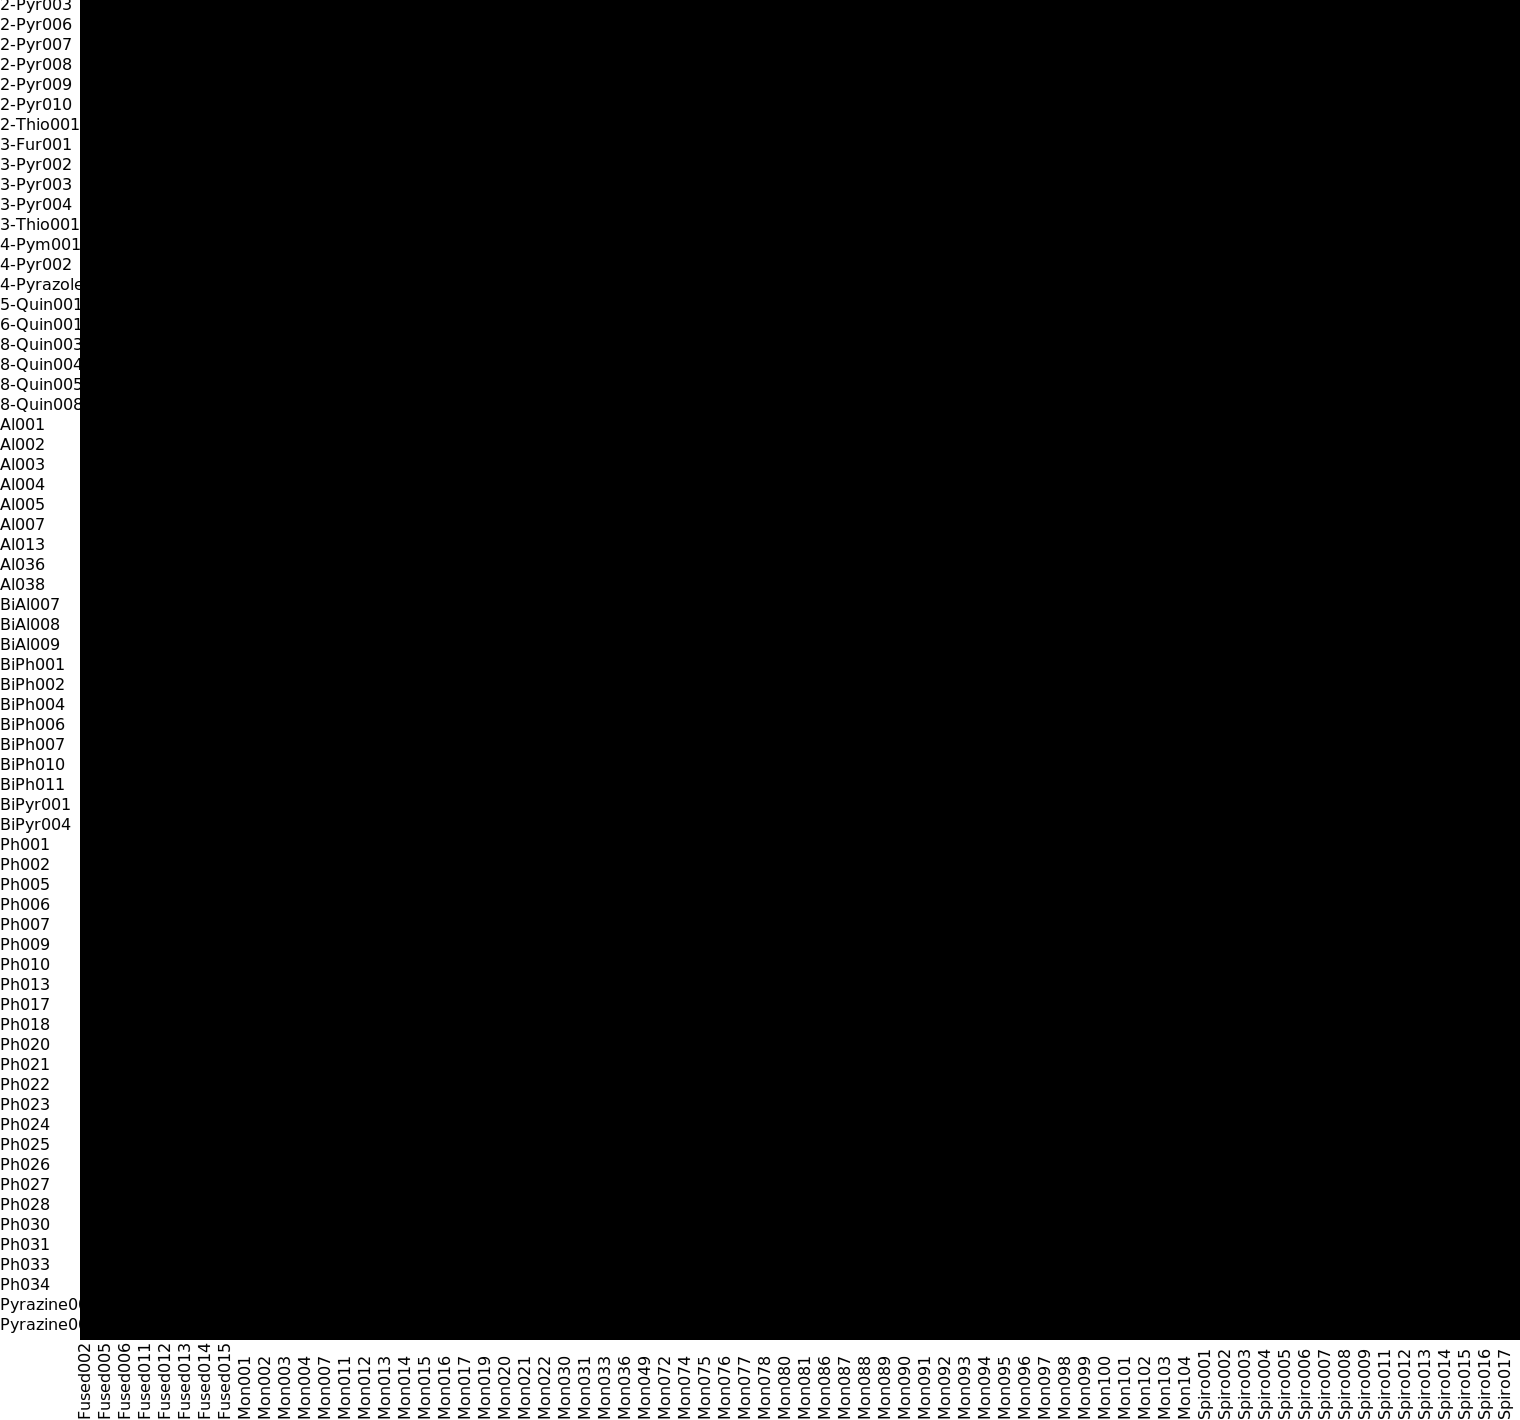

In [13]:
display(SVG(s))

In [14]:
with open("/Users/julian/Desktop/sf_heatmap_pred_binary-A.svg", "wb") as f:
    f.write(etree.tostring(svg, pretty_print=True))

Now the same for binary_B and binary_C

In [15]:
res = con.con.execute("SELECT initiator_long, monomer_long, terminator_long, binary_outcome FROM virtuallibrary v INNER JOIN virtuallibrary_predictions p on v.id = p.vl_id WHERE v.type = 'B';").fetchall()

columns = [
    "I_long", 
    "M_long", 
    "T_long", 
    "binary_B",
]
df = pd.DataFrame(res, columns=columns)

In [17]:
x_axis = "Monomer"
y_axis = "Initiator"

x_index = np.sort(df[f"{x_axis[0]}_long"].unique())
y_index = np.sort(df[f"{y_axis[0]}_long"].unique())

# some settings for the plot
rect_x = 20
rect_y = 20
text_len = 80

x_total = len(x_index) * rect_x + text_len
y_total = len(y_index) * rect_y + text_len

# set root
svg = E.svg(viewBox=f"0 0 {x_total} {y_total}")

# set internal CSS styles
style = E.style("""
.success {
  fill: #f89c20;
  stroke: #f6b45e;
}
.fail {
  fill: #e42536;
  stroke: #de4e5b;
}
.axes {
  stroke: black;
}
.axes-labels {
  fill: black;
  font-family: Helvetica, sans-serif;
  font-size: 12px;
  font-weight: bold;
}
""")
svg.append(style)

# set axes
axes = E.g()
axes.set("class", "axes")
axes.append(E.line(x1=str(text_len), x2=str(x_total), y1=str(y_total - text_len), y2=str(y_total - text_len)))  # x-axis
axes.append(E.line(x1=str(text_len), x2=str(text_len), y1="0", y2=str(y_total - text_len)))  # y-axis
svg.append(axes)

# set axes labels
axes_labels = E.g()
axes_labels.set("class", "axes-labels")
x_labels = E.text(transform=f"translate({text_len} {2 * y_total}) rotate(-90)")
y_labels = E.text(x="0", y=str(rect_y))

# x-axis labels
for i_x, x_label in enumerate(x_index):
    tspan = E.tspan(x_label, y=str((i_x + 0.5) * rect_x), x=str(y_total))
    x_labels.append(tspan)

# y-axis labels
for i_y, y_label in enumerate(y_index):
    tspan = E.tspan(y_label, x="0", y=str((i_y + 0.5) * rect_y))
    y_labels.append(tspan)

# Append the tspan elements
axes_labels.append(x_labels)
axes_labels.append(y_labels)
svg.append(axes_labels)

# set heatmap squares
squares = E.g()

for i_x, x in enumerate(x_index):
    for i_y, y in enumerate(y_index):
        data = df.loc[(df[f"{x_axis[0]}_long"] == x) & (df[f"{y_axis[0]}_long"] == y)]
        if len(data) > 0:
            offset_x = rect_x * i_x + text_len
            offset_y = rect_y * i_y
            square = E.rect(x=str(offset_x), y=str(offset_y), width=str(rect_x), height=str(rect_y), id=f"{x}_{y}")
            square.set("class", get_class(data["binary_B"]))
            squares.append(square)
svg.append(squares)

# render to string
s = etree.tostring(svg, pretty_print=True)

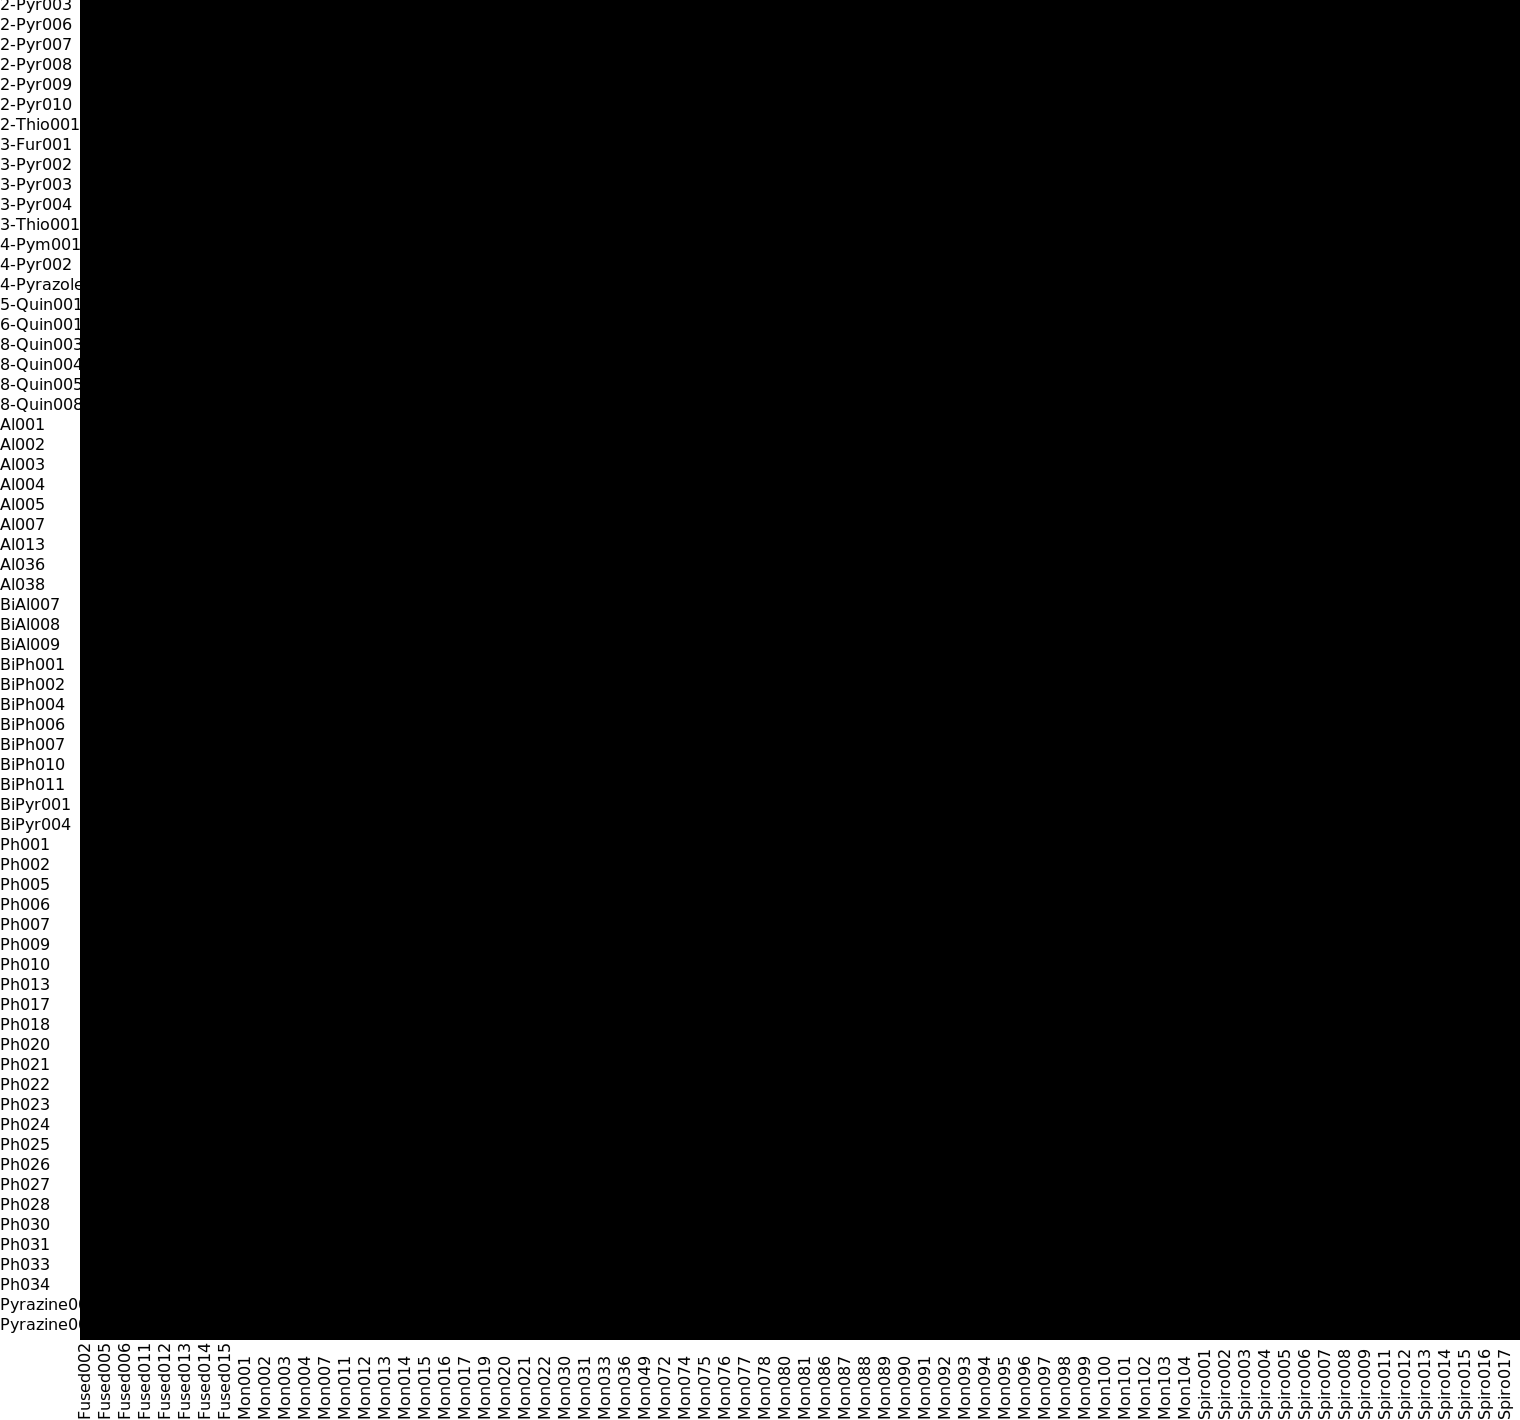

In [18]:
display(SVG(s))

In [19]:
with open("/Users/julian/Desktop/sf_heatmap_pred_binary-B.svg", "wb") as f:
    f.write(etree.tostring(svg, pretty_print=True))

In [20]:
res = con.con.execute("SELECT initiator_long, monomer_long, terminator_long, binary_outcome FROM virtuallibrary v INNER JOIN virtuallibrary_predictions p on v.id = p.vl_id WHERE v.type = 'C';").fetchall()

columns = [
    "I_long", 
    "M_long", 
    "T_long", 
    "binary_C",
]
df = pd.DataFrame(res, columns=columns)

In [22]:
x_axis = "Monomer"
y_axis = "Initiator"

x_index = np.sort(df[f"{x_axis[0]}_long"].unique())
y_index = np.sort(df[f"{y_axis[0]}_long"].unique())

# some settings for the plot
rect_x = 20
rect_y = 20
text_len = 80

x_total = len(x_index) * rect_x + text_len
y_total = len(y_index) * rect_y + text_len

# set root
svg = E.svg(viewBox=f"0 0 {x_total} {y_total}")

# set internal CSS styles
style = E.style("""
.success {
    fill: #964a8b;
    stroke: #96638e;
}
.fail {
  fill: #e42536;
  stroke: #de4e5b;
}
.axes {
  stroke: black;
}
.axes-labels {
  fill: black;
  font-family: Helvetica, sans-serif;
  font-size: 12px;
  font-weight: bold;
}
""")
svg.append(style)

# set axes
axes = E.g()
axes.set("class", "axes")
axes.append(E.line(x1=str(text_len), x2=str(x_total), y1=str(y_total - text_len), y2=str(y_total - text_len)))  # x-axis
axes.append(E.line(x1=str(text_len), x2=str(text_len), y1="0", y2=str(y_total - text_len)))  # y-axis
svg.append(axes)

# set axes labels
axes_labels = E.g()
axes_labels.set("class", "axes-labels")
x_labels = E.text(transform=f"translate({text_len} {2 * y_total}) rotate(-90)")
y_labels = E.text(x="0", y=str(rect_y))

# x-axis labels
for i_x, x_label in enumerate(x_index):
    tspan = E.tspan(x_label, y=str((i_x + 0.5) * rect_x), x=str(y_total))
    x_labels.append(tspan)

# y-axis labels
for i_y, y_label in enumerate(y_index):
    tspan = E.tspan(y_label, x="0", y=str((i_y + 0.5) * rect_y))
    y_labels.append(tspan)

# Append the tspan elements
axes_labels.append(x_labels)
axes_labels.append(y_labels)
svg.append(axes_labels)

# set heatmap squares
squares = E.g()

for i_x, x in enumerate(x_index):
    for i_y, y in enumerate(y_index):
        data = df.loc[(df[f"{x_axis[0]}_long"] == x) & (df[f"{y_axis[0]}_long"] == y)]
        if len(data) > 0:
            offset_x = rect_x * i_x + text_len
            offset_y = rect_y * i_y
            square = E.rect(x=str(offset_x), y=str(offset_y), width=str(rect_x), height=str(rect_y), id=f"{x}_{y}")
            square.set("class", get_class(data["binary_C"]))
            squares.append(square)
svg.append(squares)

# render to string
s = etree.tostring(svg, pretty_print=True)

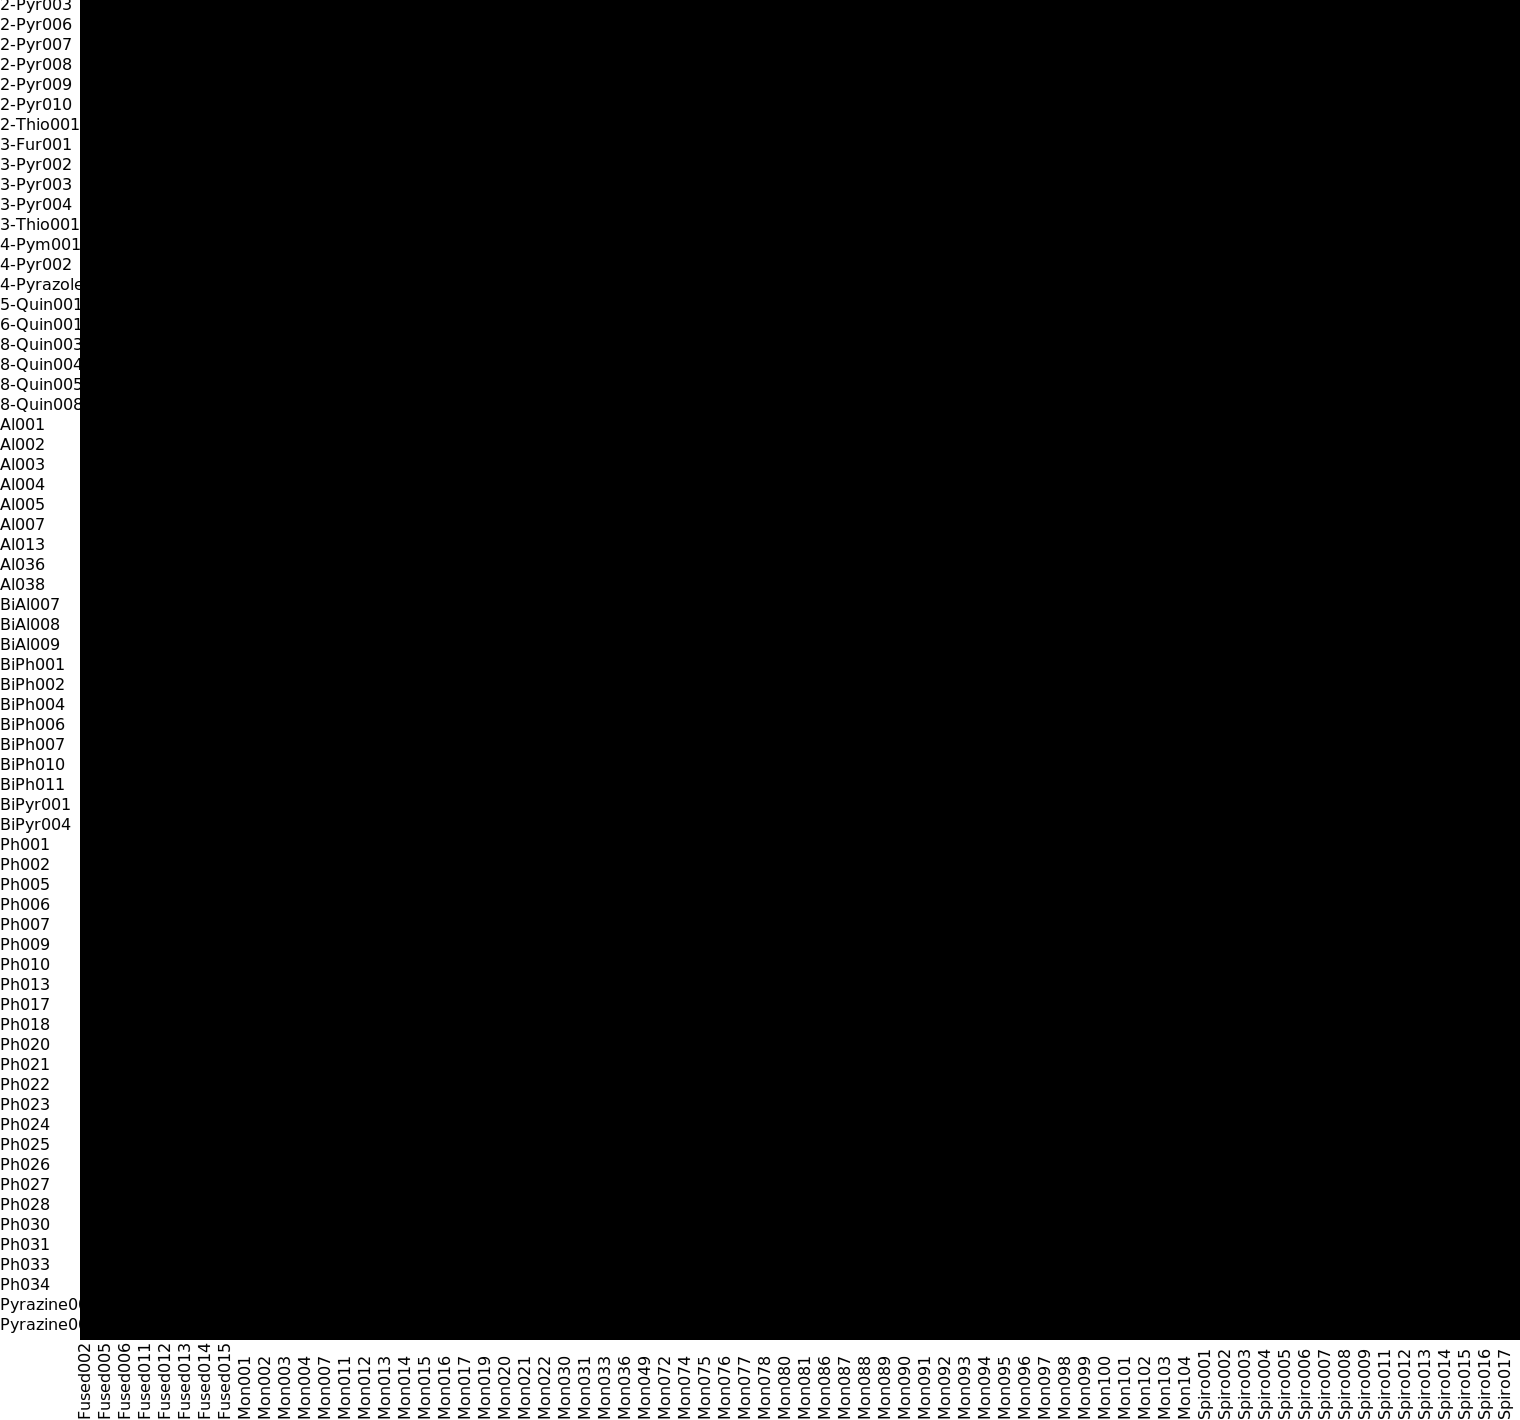

In [23]:
display(SVG(s))

In [24]:
with open("/Users/julian/Desktop/sf_heatmap_pred_binary-C.svg", "wb") as f:
    f.write(etree.tostring(svg, pretty_print=True))